### 주택 가격 예측 (House Price Regression)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

### 데이터 불러오기

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 데이터 상위 행 살펴보기

In [3]:
data = housing['frame']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['OverallQual', 'GrLivArea', 'GarageCars']
target = 'SalePrice'

X = data[features]
y = data[target]

In [5]:
X = data.select_dtypes(include=['number'])
X = X.drop(['Id', 'SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,...,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,...,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,...,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,...,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,...,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [6]:
# 결측치 처리
X = X.fillna(X.mean()) # 평균값으로 결측치 대체
X.isnull().sum().sort_values(ascending=False)

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 36, dtype: int64

In [7]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=X['OverallQual'], random_state=42)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 36) (1168,)
(292, 36) (292,)


### 다른 비선형 알고리즘

### RandomForest (랜덤포레스트)

- RandomForest 알고리즘

    - 여러 개의 DecisionTree 를 사용하여 예측을 수행하는 앙상블 (배깅: Bagging) 학습 기법이다.

    1. Bootstrap 방식으로 데이터를 랜덤 Resampling 한다. 여러 개의 서브셋을 생성한다.

        - 분산이 감소하지만, 랜덤으로 중복 추출하기 때문에 어떤 샘플은 계속 쓰이고 어떤 샘플은 사용되지 않을 가능성도 있다.
    
    2. 각 서브셋에 대해 결정 트리를 학습시킨다. 이때, 분할 기준은 특성을 무작위로 선택한다.

    3. 분류 문제의 경우 다수의 트리가 예측한 값이 최종 예측값이 되고, 회귀 문제의 경우 각 트리에서 예측한 값들의 평균을 구한다.

- RandomForest 특징

    - 여러 개의 트리를 결합하여 과대적합을 방지한다.

    - 단일 결정 트리보다 더 높은 정확도를 보인다. 비선형 데이터나 복잡한 데이터에서 유리하다.

    - 어느 특성이 예측에 얼마나 중요한지 특성의 중요도를 평가할 수 있다.

- RandomForest 하이퍼파라미터

    - n_estimators : RandomForest 에서 사용할 결정 트리의 개수를 지정한다. 많을수록 성능이 향상되지만 계산 비용도 증가한다.

    - max_depth : 각 결정 트리의 최대 깊이를 설정한다. 너무 깊으면 과대적합 발생할 수 있고, 너무 얕으면 단순해져 적절한 값을 설정하는게 중요하다.

    - min_samples_split : 각 노드를 분할하기 위한 최소 샘플 수를 설정한다. 이 값을 늘리면 트리의 깊이가 제한되어 과적합을 방지할 수 있다.

    - max_features : 각 분할에서 고려할 최대 특성 수를 설정한다. 이 값을 낮추면 과적합을 방지할 수 있다.

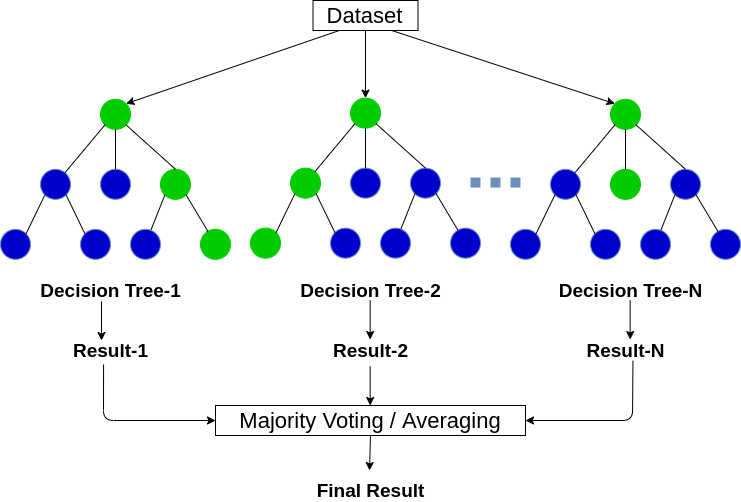

In [8]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=42) # n_estimators : tree 의 개수
random_forest.fit(X_tr, y_tr)

print(f"훈련 셋: {random_forest.score(X_tr, y_tr)}")
print(f"검증 셋: {random_forest.score(X_val, y_val)}")

훈련 셋: 0.7139505425530158
검증 셋: 0.6389565812062394


In [9]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators=100, max_depth=3, random_state=2021)
xgbr.fit(X_tr, y_tr)

print(f"훈련 셋: {xgbr.score(X_tr, y_tr)}")
print(f"검증 셋: {xgbr.score(X_val, y_val)}")

훈련 셋: 0.9832895398139954
검증 셋: 0.8210676908493042


In [10]:
from lightgbm import LGBMRegressor
lgbr = LGBMRegressor(n_estimators=100, max_depth=3, random_state=2021)
lgbr.fit(X_tr, y_tr)

print(f"훈련 셋: {lgbr.score(X_tr, y_tr)}")
print(f"검증 셋: {lgbr.score(X_val, y_val)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2904
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180273.876712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g